In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import FeatureAgglomeration
import matplotlib.pyplot as plt

In [94]:
data_np = pd.read_csv("datasets/spectra_forest_floor.csv")
data_np = data_np[(data_np['plot_ID'] != 'HY_PINE5') | (data_np['location'] != 15)]
class_labels = data_np["plot_ID"]
data_np = data_np.drop(columns=["plot_ID", "location"])
data_np = data_np.to_numpy()[:,1:]

In [95]:
data_np

array([[ 1.64742160e-02,  1.67021320e-02,  1.70008620e-02, ...,
         1.60803625e+00,  1.48152850e+00,  1.92000023e+00],
       [ 1.40290940e-02,  1.41673830e-02,  1.42059940e-02, ...,
         2.69828242e-01,  1.19795895e+00,  2.93990392e+00],
       [ 1.58642470e-02,  1.59525240e-02,  1.58723700e-02, ...,
         1.87115708e+00,  3.93370401e+00, -7.02670545e+01],
       ...,
       [ 1.44262350e-02,  1.45137140e-02,  1.45445930e-02, ...,
        -1.01630259e+01,  2.87106048e+01,  7.00539668e+00],
       [ 1.99505810e-02,  1.99579870e-02,  1.97161120e-02, ...,
        -3.87427912e-01, -1.38662758e+00, -3.73689524e+00],
       [ 1.56658760e-02,  1.57715700e-02,  1.60104730e-02, ...,
        -2.60718237e+00, -2.74665882e+00, -2.01420312e+00]],
      shape=(869, 2150))

In [96]:
scaler = StandardScaler()
data_np_scaled = scaler.fit_transform(data_np)

In [97]:
data_np_scaled

array([[ 5.17916664e-02,  9.30403722e-02,  1.34445975e-01, ...,
         3.39221793e-02,  5.24386075e-02,  8.90227159e-02],
       [-4.08661131e-01, -3.87547060e-01, -3.92156524e-01, ...,
         3.38783895e-02,  4.90982840e-02,  1.49385355e-01],
       [-6.30745579e-02, -4.90850154e-02, -7.81818510e-02, ...,
         3.39307893e-02,  8.13241473e-02, -4.18334259e+00],
       ...,
       [-3.33873580e-01, -3.21882836e-01, -3.28358491e-01, ...,
         3.35369989e-02,  3.73185048e-01,  3.90000106e-01],
       [ 7.06442840e-01,  7.10349224e-01,  6.46047036e-01, ...,
         3.38568824e-02,  1.86530012e-02, -2.45778642e-01],
       [-1.00430764e-01, -8.33938240e-02, -5.21608064e-02, ...,
         3.37842461e-02,  2.63243648e-03, -1.43821718e-01]],
      shape=(869, 2150))

In [98]:
# Reduce to desired number of components (e.g., 50)
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data_np_scaled)

# Explained variance to understand how much information is retained
print(pca.explained_variance_ratio_)

[0.3976302  0.25806467 0.03493557 0.0109266  0.00936896 0.00712813
 0.00643094 0.00522199 0.00508499 0.00421119]


In [99]:
data_pca

array([[ -2.79779792, -15.29312663,   9.61284359, ...,   1.86844205,
          0.65567755,  -0.06861206],
       [-29.9076889 , -17.95256773,  23.39647569, ...,   3.60962387,
          3.06621483,  -0.91922202],
       [  5.94969536,  -5.43512095,   4.00435956, ...,   3.98956861,
          1.97113268,   0.87951268],
       ...,
       [ -5.85952451, -12.32198873, -11.17126966, ...,   1.88387708,
          0.92037529,   0.06065723],
       [ 24.99167227,  10.96050715, -10.04396904, ...,   4.03588322,
          0.74099512,  -0.4004273 ],
       [-11.11346505, -18.22941557, -14.25674769, ...,   2.21235288,
          0.75803703,   0.19336253]], shape=(869, 10))

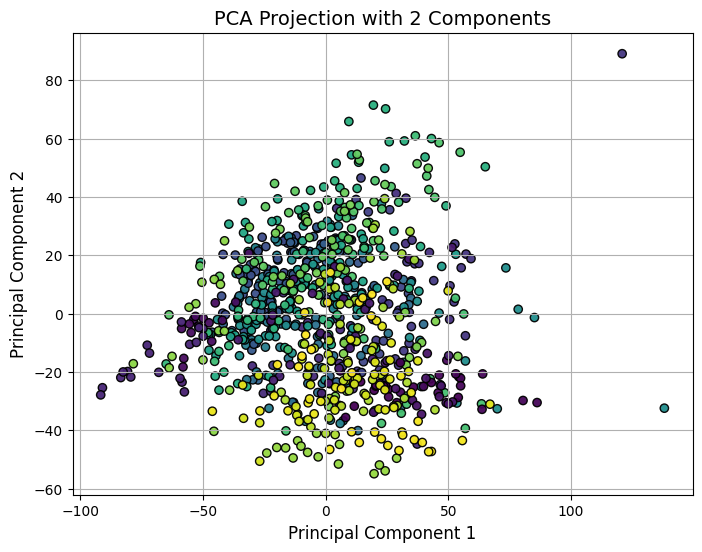

In [100]:
pca_plot = PCA(n_components=2)
data_pca_plot = pca.fit_transform(data_np_scaled)

# Plot the PCA output
plt.figure(figsize=(8, 6))
# class_labels = np.array(pd.read_csv('datasets/sff_loc.csv', index_col=False).to_numpy()[:,0])
encoder = LabelEncoder()
class_labels_encoded = encoder.fit_transform(class_labels)
scatter = plt.scatter(data_pca_plot[:, 0], data_pca_plot[:, 1], c=class_labels_encoded, cmap='viridis', alpha=0.95, edgecolor='k')


# Add labels and title
plt.title('PCA Projection with 2 Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.savefig('plots/pca_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [101]:
df = pd.DataFrame(data_pca)
df.to_csv('datasets/10features_pca.csv', index=False)

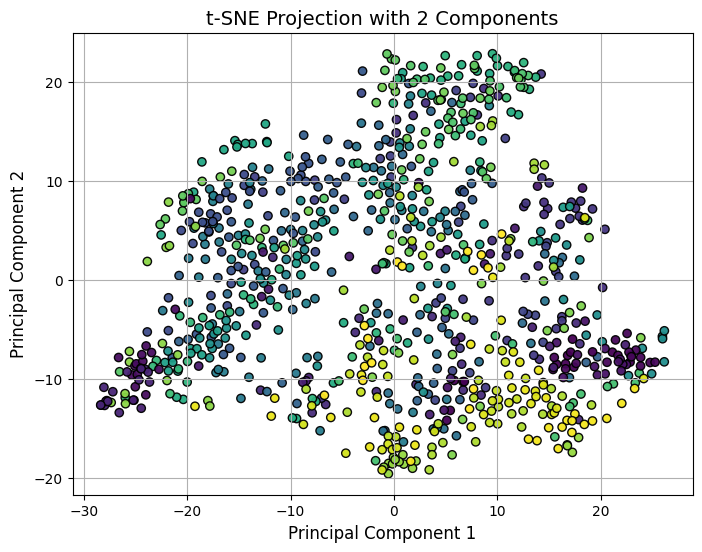

In [102]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne_plot = tsne.fit_transform(data_np_scaled)

# Plot the PCA output
plt.figure(figsize=(8, 6))
# class_labels = np.array(pd.read_csv('datasets/sff_loc.csv', index_col=False).to_numpy()[:,0])
encoder = LabelEncoder()
class_labels_encoded = encoder.fit_transform(class_labels)
scatter = plt.scatter(data_tsne_plot[:, 0], data_tsne_plot[:, 1], c=class_labels_encoded, cmap='viridis', alpha=0.95, edgecolor='k')


# Add labels and title
plt.title('t-SNE Projection with 2 Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.savefig('plots/tsne_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [103]:
agglo = FeatureAgglomeration(n_clusters=10)
data_agglo = agglo.fit_transform(data_np_scaled)
df = pd.DataFrame(data_agglo)
df.to_csv('datasets/10features_data_agglo.csv', index=False)

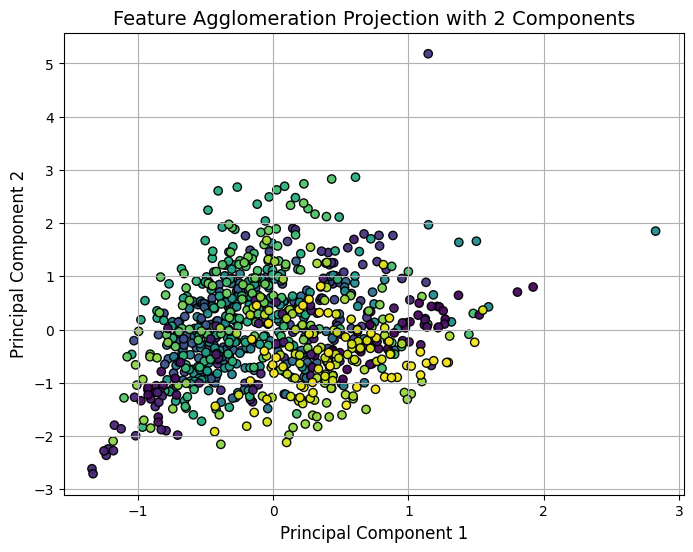

In [104]:
agglo = FeatureAgglomeration(n_clusters=2)
data_agglo_plot = agglo.fit_transform(data_np_scaled)

# Plot the PCA output
plt.figure(figsize=(8, 6))
# class_labels = np.array(pd.read_csv('datasets/sff_loc.csv', index_col=False).to_numpy()[:,0])
encoder = LabelEncoder()
class_labels_encoded = encoder.fit_transform(class_labels)
scatter = plt.scatter(data_agglo_plot[:, 0], data_agglo_plot[:, 1], c=class_labels_encoded, cmap='viridis', alpha=0.95, edgecolor='k')


# Add labels and title
plt.title('Feature Agglomeration Projection with 2 Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.savefig('plots/feature_agglomeration.png', dpi=300, bbox_inches='tight')
plt.show()